# 01-Kaggle House Prices 2023

## Import data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

In [2]:
df = pd.read_csv('data/House_Price_dataset.csv')
df2 = pd.read_csv('data/For_EDA_dataset.csv', index_col=0, parse_dates=['date_added'])

## Data structure

In [3]:
df.shape

(168446, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  object 
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Area Type      168446 non-nul

In [5]:
# Properties with "0"-values
# decimals instead of scientific E
# plot histograms, doar numerice
df.describe()

# price
# The price distribution is highly right-skewed, with a wide range of prices.

# baths
# The number of baths seems to have a wide range, and the maximum value might be an outlier.

# bedrooms
# Similar to the number of baths, the number of bedrooms also has a wide range.

# Area Size
# The area size also has a wide range, and the maximum value might be an outlier.

,property_id,location_id,price,latitude,longitude,baths,bedrooms,Area Size
count,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000
mean,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422,5.892188
std,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401,5.778327
min,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000
25%,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000,3.000000
50%,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000,5.000000
75%,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000,8.000000
max,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000,800.000000


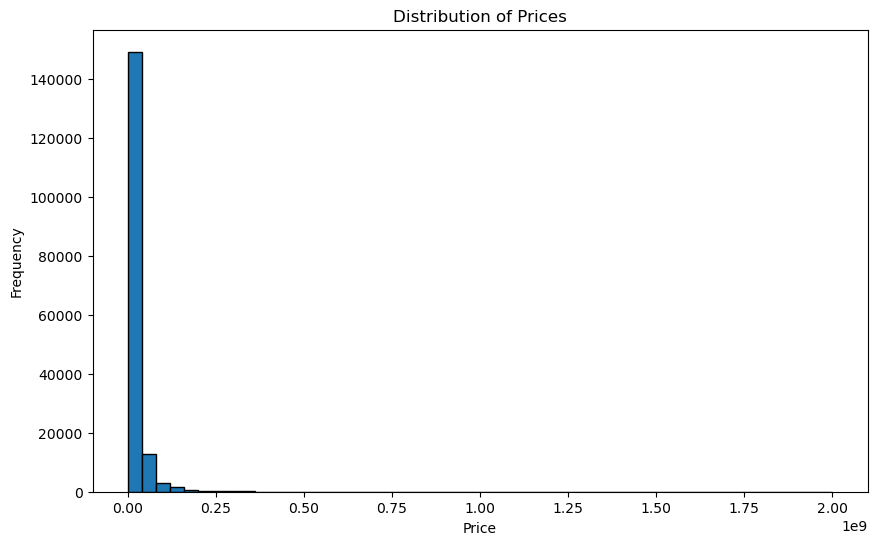

count    1.684460e+05
mean     1.776576e+07
std      3.531003e+07
min      0.000000e+00
25%      1.750000e+05
50%      8.500000e+06
75%      1.950000e+07
max      2.000000e+09
Name: price, dtype: float64


In [6]:
# Plotting a histogram for the 'price' column
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=50, edgecolor='black')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Additional statistics
price_stats = df['price'].describe()
print(price_stats)

In [7]:
df.isnull().sum()

property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
area                 0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Area Type            0
Area Size            0
Area Category        0
dtype: int64

In [8]:
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


## Values per property

In [9]:
unique_locations = df['location_id'].unique()
unique_locations

array([ 3325,  3236,   764, ...,  9782, 13962, 13689])

In [10]:
# Extra from documentaion: "Penthouse"
df['property_type'].value_counts(dropna=False)

property_type
House            105468
Flat              38238
Upper Portion     13774
Lower Portion      9229
Room                685
Farm House          657
Penthouse           395
Name: count, dtype: int64

In [11]:
df['location'].nunique()

1509

In [12]:
df['city'].value_counts()

city
Karachi       60484
Lahore        41427
Islamabad     37426
Rawalpindi    20976
Faisalabad     8133
Name: count, dtype: int64

In [13]:
df['province_name'].value_counts()

province_name
Punjab               70536
Sindh                60484
Islamabad Capital    37426
Name: count, dtype: int64

In [14]:
df['baths'].value_counts()

baths
0      42382
3      34603
2      25754
4      19407
6      16648
5      15303
7       5385
1       5356
8       2035
10       855
9        696
12        10
11         5
13         3
14         3
403        1
Name: count, dtype: int64

In [15]:
df['purpose'].value_counts()

purpose
For Sale    120655
For Rent     47791
Name: count, dtype: int64

In [16]:
df['bedrooms'].value_counts()

bedrooms
3     45867
2     30741
5     23452
4     23027
0     22704
6     11929
1      4434
7      2973
8      1451
9       782
10      611
11      416
12       25
14        8
15        7
16        4
28        4
13        3
25        3
18        2
21        1
68        1
27        1
Name: count, dtype: int64

## Empty values

In [17]:
df['Area Type'].value_counts()

Area Type
Marla    137769
Kanal     30677
Name: count, dtype: int64

In [18]:
# See hypotests if it counts agency null
df.isna().sum()

property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
area                 0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Area Type            0
Area Size            0
Area Category        0
dtype: int64

## Structure

/home/liviu/anaconda3/envs/ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/liviu/anaconda3/envs/ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


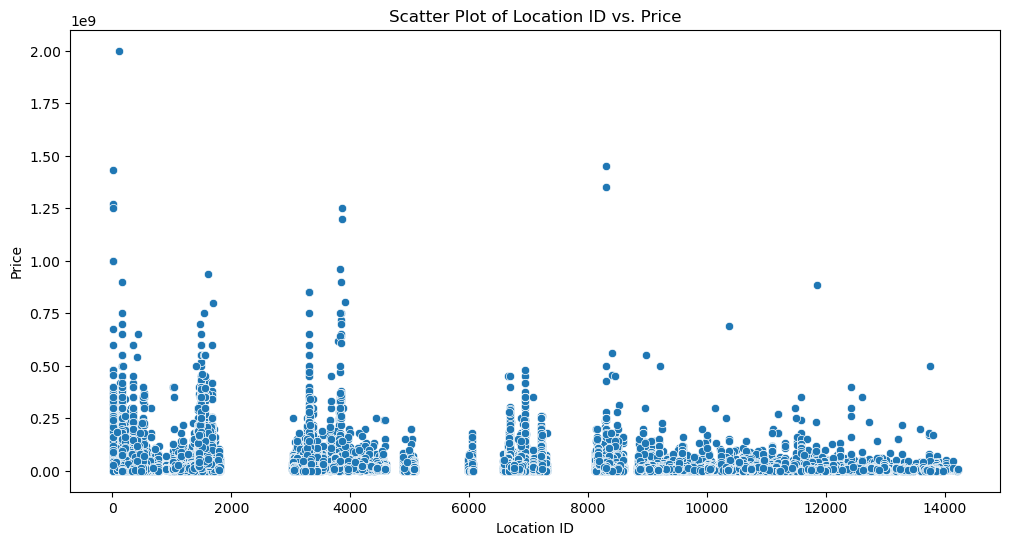

In [19]:
# Assuming df is your DataFrame
plt.figure(figsize=(12, 6))
sns.scatterplot(x='location_id', y='price', data=df)
plt.title('Scatter Plot of Location ID vs. Price')
plt.xlabel('Location ID')
plt.ylabel('Price')
plt.show()

/home/liviu/anaconda3/envs/ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/liviu/anaconda3/envs/ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/liviu/anaconda3/envs/ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


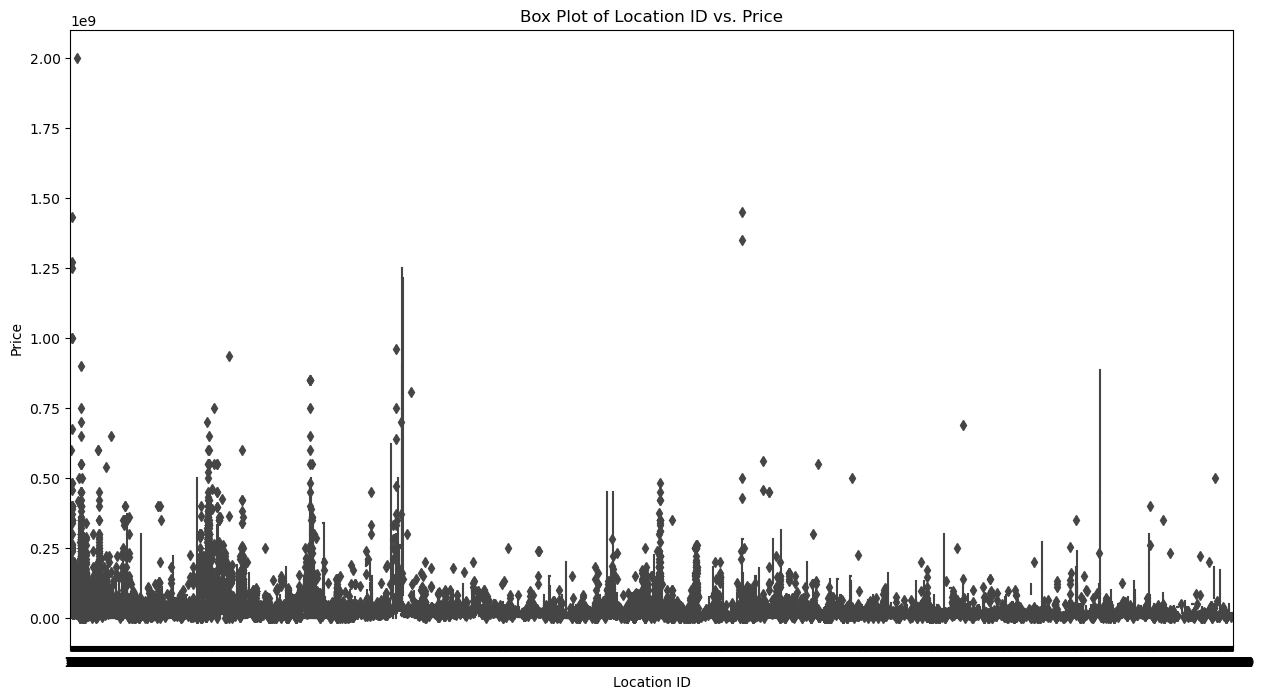

In [20]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='location_id', y='price', data=df)
plt.title('Box Plot of Location ID vs. Price')
plt.xlabel('Location ID')
plt.ylabel('Price')
plt.show()

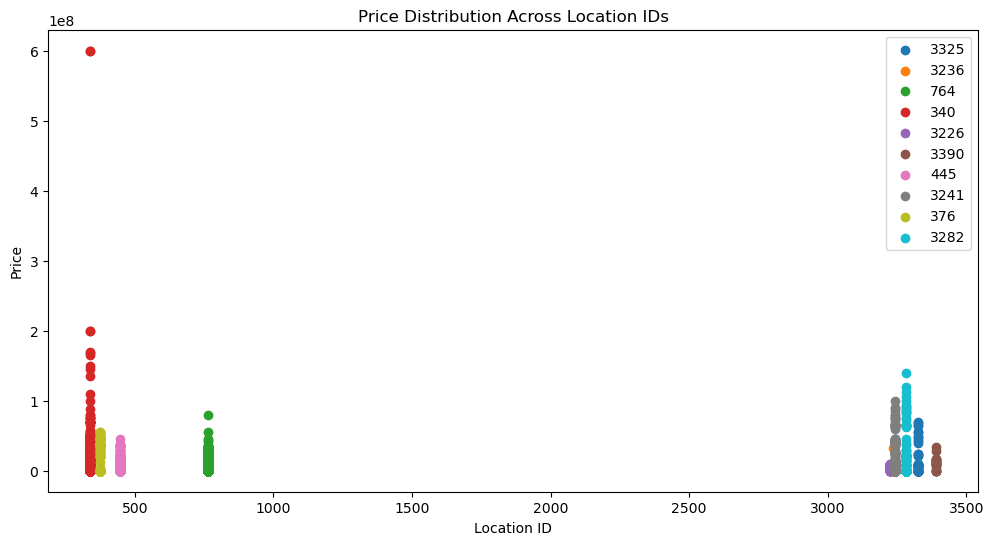

In [21]:
plt.figure(figsize=(12, 6))
for location_id in unique_locations[:10]:  # Plot for a subset of locations for visibility
    subset_df = df[df['location_id'] == location_id]
    plt.scatter(subset_df['location_id'], subset_df['price'], label=str(location_id))

plt.xlabel('Location ID')
plt.ylabel('Price')
plt.title('Price Distribution Across Location IDs')
plt.legend()
plt.show()

In [22]:
# Example: One-way ANOVA test
# H0: There is no significant difference in prices between location_id groups
# H1: There is a significant difference in prices between location_id groups
f_statistic, p_value = f_oneway(*[df['price'][df['location_id'] == location] for location in unique_locations])

print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

F-statistic: 14.759612775173302
P-value: 0.0


/home/liviu/anaconda3/envs/ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/liviu/anaconda3/envs/ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/liviu/anaconda3/envs/ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


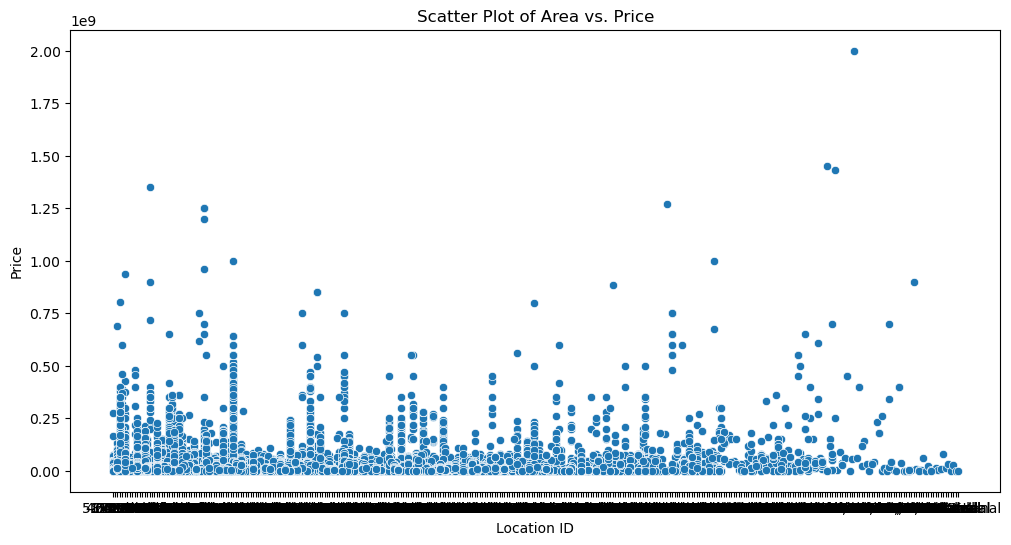

In [23]:
# Assuming df is your DataFrame
plt.figure(figsize=(12, 6))
sns.scatterplot(x='area', y='price', data=df)
plt.title('Scatter Plot of Area vs. Price')
plt.xlabel('Location ID')
plt.ylabel('Price')
plt.show()

In [24]:
# Create a new column 'Area_in_Marla' based on 'Area Type' and 'Area Size'
df['Area_in_Marla'] = df.apply(lambda row: row['Area Size'] if row['Area Type'] == 'Marla' else row['Area Size'] * 20, axis=1)

In [25]:
# property_id:
# These column appears to be identifiers or indices that might not provide valuable information for predictive modeling or exploratory data analysis (EDA). If they are simply identifiers without any meaningful patterns, they might not contribute to the understanding or prediction of house prices.

# location_id
# See above no correlation between price and location_id

# page_url:
# This column contains URLs, which are likely unique identifiers or links to specific property pages. For the purpose of predicting house prices or general analysis, the URLs may not be relevant or contribute to the modeling process.

# area
# included in "Area Type", "Area Size"

# Area Type, Area Size:
# included in "Area_in_Marla"

# Area Category
# included in "Area Size"
df.drop(['property_id', 'location_id', 'page_url', 'area', 'Area Type', 'Area Size', 'Area Category'], axis=1, inplace=True)

In [26]:
df.head()

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Area_in_Marla
0,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,02-04-2019,NaN,NaN,4.0
1,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,05-04-2019,NaN,NaN,5.6
2,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,07-17-2019,NaN,NaN,8.0
3,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,04-05-2019,NaN,NaN,40.0
4,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,8.0


In [27]:
df['date_added'] = pd.to_datetime(df['date_added'])
df.head()

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Area_in_Marla
0,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2019-02-04,NaN,NaN,4.0
1,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,2019-05-04,NaN,NaN,5.6
2,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,2019-07-17,NaN,NaN,8.0
3,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,2019-04-05,NaN,NaN,40.0
4,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,2019-07-10,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,8.0


In [28]:
df['agency'].nunique()

5761

In [29]:
df['agency'].fillna('Self', inplace=True)
df['agent'].fillna('Self', inplace=True)
df.head()

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Area_in_Marla
0,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2019-02-04,Self,Self,4.0
1,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,2019-05-04,Self,Self,5.6
2,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,2019-07-17,Self,Self,8.0
3,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,2019-04-05,Self,Self,40.0
4,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,2019-07-10,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,8.0


In [30]:
# Why no diff ?
# I used "diff export.csv For_EDA_dataset.csv"
df_diff = pd.concat([df, df2]).drop_duplicates(keep=False)
df_diff

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Area_in_Marla


In [31]:
df.drop_duplicates(inplace=True)

In [32]:
df.to_csv('data/export.csv')

## Q&A 1

* Kaggle dataset differences: basic, EDA, model
* Row numbers for previous datasets
* What columns to keep?
* Is there any need to remove other rows?

## Q&A 2:
* is my logic of remove `location_id` column correct?